## 1. Imports

In [42]:
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from joblib import dump, load
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

## 2. Loading the data

In [2]:
stock_ticker = "GME"

In [3]:
df = pd.read_csv(f"../../../data/stock_prediction/stock_prediction_data/stock_prediction_data_{stock_ticker}.csv", index_col=[0])

In [4]:
# log_return_t+1 is to predict -> positive or negative return
target = df["log_return_shift"].apply(lambda x: 1 if x > 0 else 0)

# used features to predict stock return
features = ["Negative", "Neutral", "Positive", "count", "pos_minus_neg","pos_minus_neg_times_count", "Volume", "pos_minus_neg_diff", "count_diff"]
df = df[features]


In [5]:
df

,Negative,Neutral,Positive,count,pos_minus_neg,pos_minus_neg_times_count,Volume,pos_minus_neg_diff,count_diff
2021-05-04,0.271763,0.360857,0.367380,499,0.095617,47.712727,4007500,-0.068648,3.0
2021-05-05,0.229515,0.447798,0.322687,820,0.093173,76.401538,2805400,-0.002444,321.0
2021-05-06,0.201018,0.429720,0.369262,1647,0.168243,277.096813,2942800,0.075071,827.0
2021-05-07,0.200771,0.395441,0.403788,734,0.203017,149.014766,2934600,0.034774,-913.0
2021-05-10,0.290007,0.379028,0.330965,756,0.040958,30.964170,4806700,-0.162059,22.0
...,...,...,...,...,...,...,...,...,...
2022-04-22,0.259425,0.387646,0.352929,166,0.093503,15.521564,1569600,0.026664,2.0
2022-04-25,0.251789,0.407347,0.340865,226,0.089076,20.131230,1534800,-0.004427,60.0
2022-04-26,0.341325,0.328281,0.330394,198,-0.010931,-2.164416,1545700,-0.100008,-28.0
2022-04-27,0.228449,0.414548,0.357003,245,0.128553,31.495606,1305900,0.139485,47.0


In [6]:
target.value_counts(normalize=True)

0    0.532
1    0.468
Name: log_return_shift, dtype: float64

## 3. Data transformation

In [7]:
# Data normalization
df = (df - df.mean())/df.std()

In [8]:
# Stratified split
X_train, X_test, Y_train, Y_test = train_test_split(df, target, stratify=target, test_size=0.25, random_state=42)

In [9]:
Y_train

2021-10-25    1
2021-05-13    0
2021-09-15    1
2021-12-10    0
2021-06-21    1
             ..
2021-12-27    0
2021-09-29    0
2022-02-14    1
2021-12-01    1
2022-03-01    1
Name: log_return_shift, Length: 187, dtype: int64

In [10]:
Y_test.value_counts(normalize=True)

0    0.539683
1    0.460317
Name: log_return_shift, dtype: float64

## 4. Model training and prediction

In [11]:
# Create LR classifier
clf_lr = LogisticRegression(random_state=42).fit(X_train, Y_train)

In [12]:
train_acc_lr = clf_lr.score(X_train, Y_train)
test_acc_lr = clf_lr.score(X_test, Y_test)

In [13]:
# Create DT classifier
clf_dt = DecisionTreeClassifier().fit(X_train, Y_train)

In [14]:
train_acc_dt = clf_dt.score(X_train, Y_train)
test_acc_dt = clf_dt.score(X_test, Y_test)

In [15]:
# Create RF classifier
clf_rf = RandomForestClassifier(random_state=42).fit(X_train, Y_train)

In [16]:
train_acc_rf = clf_rf.score(X_train, Y_train)
test_acc_rf = clf_rf.score(X_test, Y_test)

In [17]:
# Create XGBoost classifier
cl_xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss').fit(X_train, Y_train)

In [18]:
train_acc_xgb = cl_xgb.score(X_train, Y_train)
test_acc_xgb = cl_xgb.score(X_test, Y_test)

In [19]:
# Create KNN classifier
clf_knn = KNeighborsClassifier().fit(X_train, Y_train)

In [20]:
train_acc_knn = clf_knn.score(X_train, Y_train)
test_acc_knn = clf_knn.score(X_test, Y_test)

In [21]:
# Create MLP classifier
clf_mlp = MLPClassifier(random_state=42, max_iter=100).fit(X_train, Y_train)

C:\Users\janbu\anaconda3\envs\thesis\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [22]:
train_acc_mlp = clf_mlp.score(X_train, Y_train)
test_acc_mlp = clf_mlp.score(X_test, Y_test)

In [23]:
result_df = pd.DataFrame(
    data={
        "Model": ["Logistic Regression", "Decision Tree", "Random Forest", "XGBoost", "K-Nearest Neighbour", "Neural Network"],
        "Train Accuracy": [train_acc_lr, train_acc_dt, train_acc_rf, train_acc_xgb, train_acc_knn, train_acc_mlp],
        "Test Accuracy": [test_acc_lr, test_acc_dt, test_acc_rf, test_acc_xgb, test_acc_knn, test_acc_mlp]
    }
)

In [24]:
result_df

,Model,Train Accuracy,Test Accuracy
0,Logistic Regression,0.550802,0.492063
1,Decision Tree,1.000000,0.587302
2,Random Forest,1.000000,0.539683
3,XGBoost,1.000000,0.587302
4,K-Nearest Neighbour,0.641711,0.396825
5,Neural Network,0.668449,0.523810


In [115]:
result_df.to_excel(f"../../../data/stock_prediction/stock_prediction_model_results/{stock_ticker}.xlsx")

## 5. Saving all models

In [ ]:
dump(clf_lr, f'../../../models/stock_prediction/{stock_ticker}/Logistic_Regression.joblib')

In [119]:
dump(clf_dt, f'../../../models/stock_prediction/{stock_ticker}/Decision_Tree.joblib')

['../../../models/stock_prediction/GME/Decision_Tree.joblib']

In [120]:
dump(clf_rf, f'../../../models/stock_prediction/{stock_ticker}/Random_Forest.joblib')

['../../../models/stock_prediction/GME/Random_Forest.joblib']

In [121]:
dump(cl_xgb, f'../../../models/stock_prediction/{stock_ticker}/XGBoost.joblib')

['../../../models/stock_prediction/GME/XGBoost.joblib']

In [122]:
dump(clf_knn, f'../../../models/stock_prediction/{stock_ticker}/K-Nearest_Neighbour.joblib')

['../../../models/stock_prediction/GME/K-Nearest_Neighbour.joblib']

In [123]:
dump(clf_mlp, f'../../../models/stock_prediction/{stock_ticker}/Neural_Network.joblib')

['../../../models/stock_prediction/GME/Neural_Network.joblib']

## 6. Best model inspection - XGBoost

In [28]:
y_pred = cl_xgb.predict(X_test)
y_true = Y_test

In [33]:
# Calculate accuracy, precision, recall and f1-score with micro average
prec = precision_score(y_true=y_true, y_pred=y_pred)
recall = recall_score(y_true=y_true, y_pred=y_pred)
f1 = f1_score(y_true=y_true, y_pred=y_pred)

In [40]:
# Create raw and normalized confusion matrices
cm_raw = confusion_matrix(y_true, y_pred)
cm_normalized = np.round(cm_raw.astype('float') / cm_raw.sum(axis=1)[:, np.newaxis], decimals=2)

In [41]:
cm_raw

array([[19, 15],
       [11, 18]], dtype=int64)

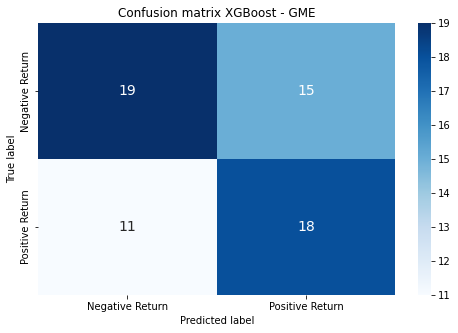

In [44]:
# Create confusion matrices with seaborn

# Raw Confusion matrix
df_cm_raw = pd.DataFrame(cm_raw, columns=["Negative Return", "Positive Return"], index=["Negative Return", "Positive Return"])
df_cm_raw.index.name = "True label"
df_cm_raw.columns.name = "Predicted label"
plt.figure(figsize=(8, 5))
plt.title(f"Confusion matrix XGBoost - GME")
plot_cm_raw = sns.heatmap(
    df_cm_raw, cmap="Blues", annot=True, annot_kws={"size": 14}
)  # font size


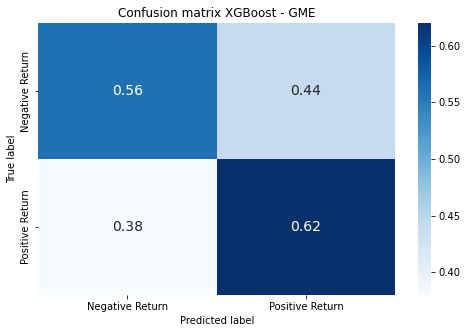

In [53]:
# Normalized by true label Confusion matrix
df_cm_raw = pd.DataFrame(cm_normalized, columns=["Negative Return", "Positive Return"], index=["Negative Return", "Positive Return"])
df_cm_raw.index.name = "True label"
df_cm_raw.columns.name = "Predicted label"
plt.figure(figsize=(8, 5))
plt.title(f"Confusion matrix XGBoost - GME")
plot_cm_raw = sns.heatmap(
    df_cm_raw, cmap="Blues", annot=True, annot_kws={"size": 14}
)  # font size

In [ ]:
# von allen positve returns 62% richtig von allen negative returns 56% richtig

In [ ]:
# noch 1 plot mit labels as color und actual amount of return as scale on x and y is true label and color is predicted label maybe